In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load data
df = pd.read_csv("data/TRAIN.csv")


In [3]:
# Drop NA and non-numeric columns for correlation and pairplot
df_clean = df.dropna()
df_numeric = df_clean.select_dtypes(include=['int64', 'float64'])

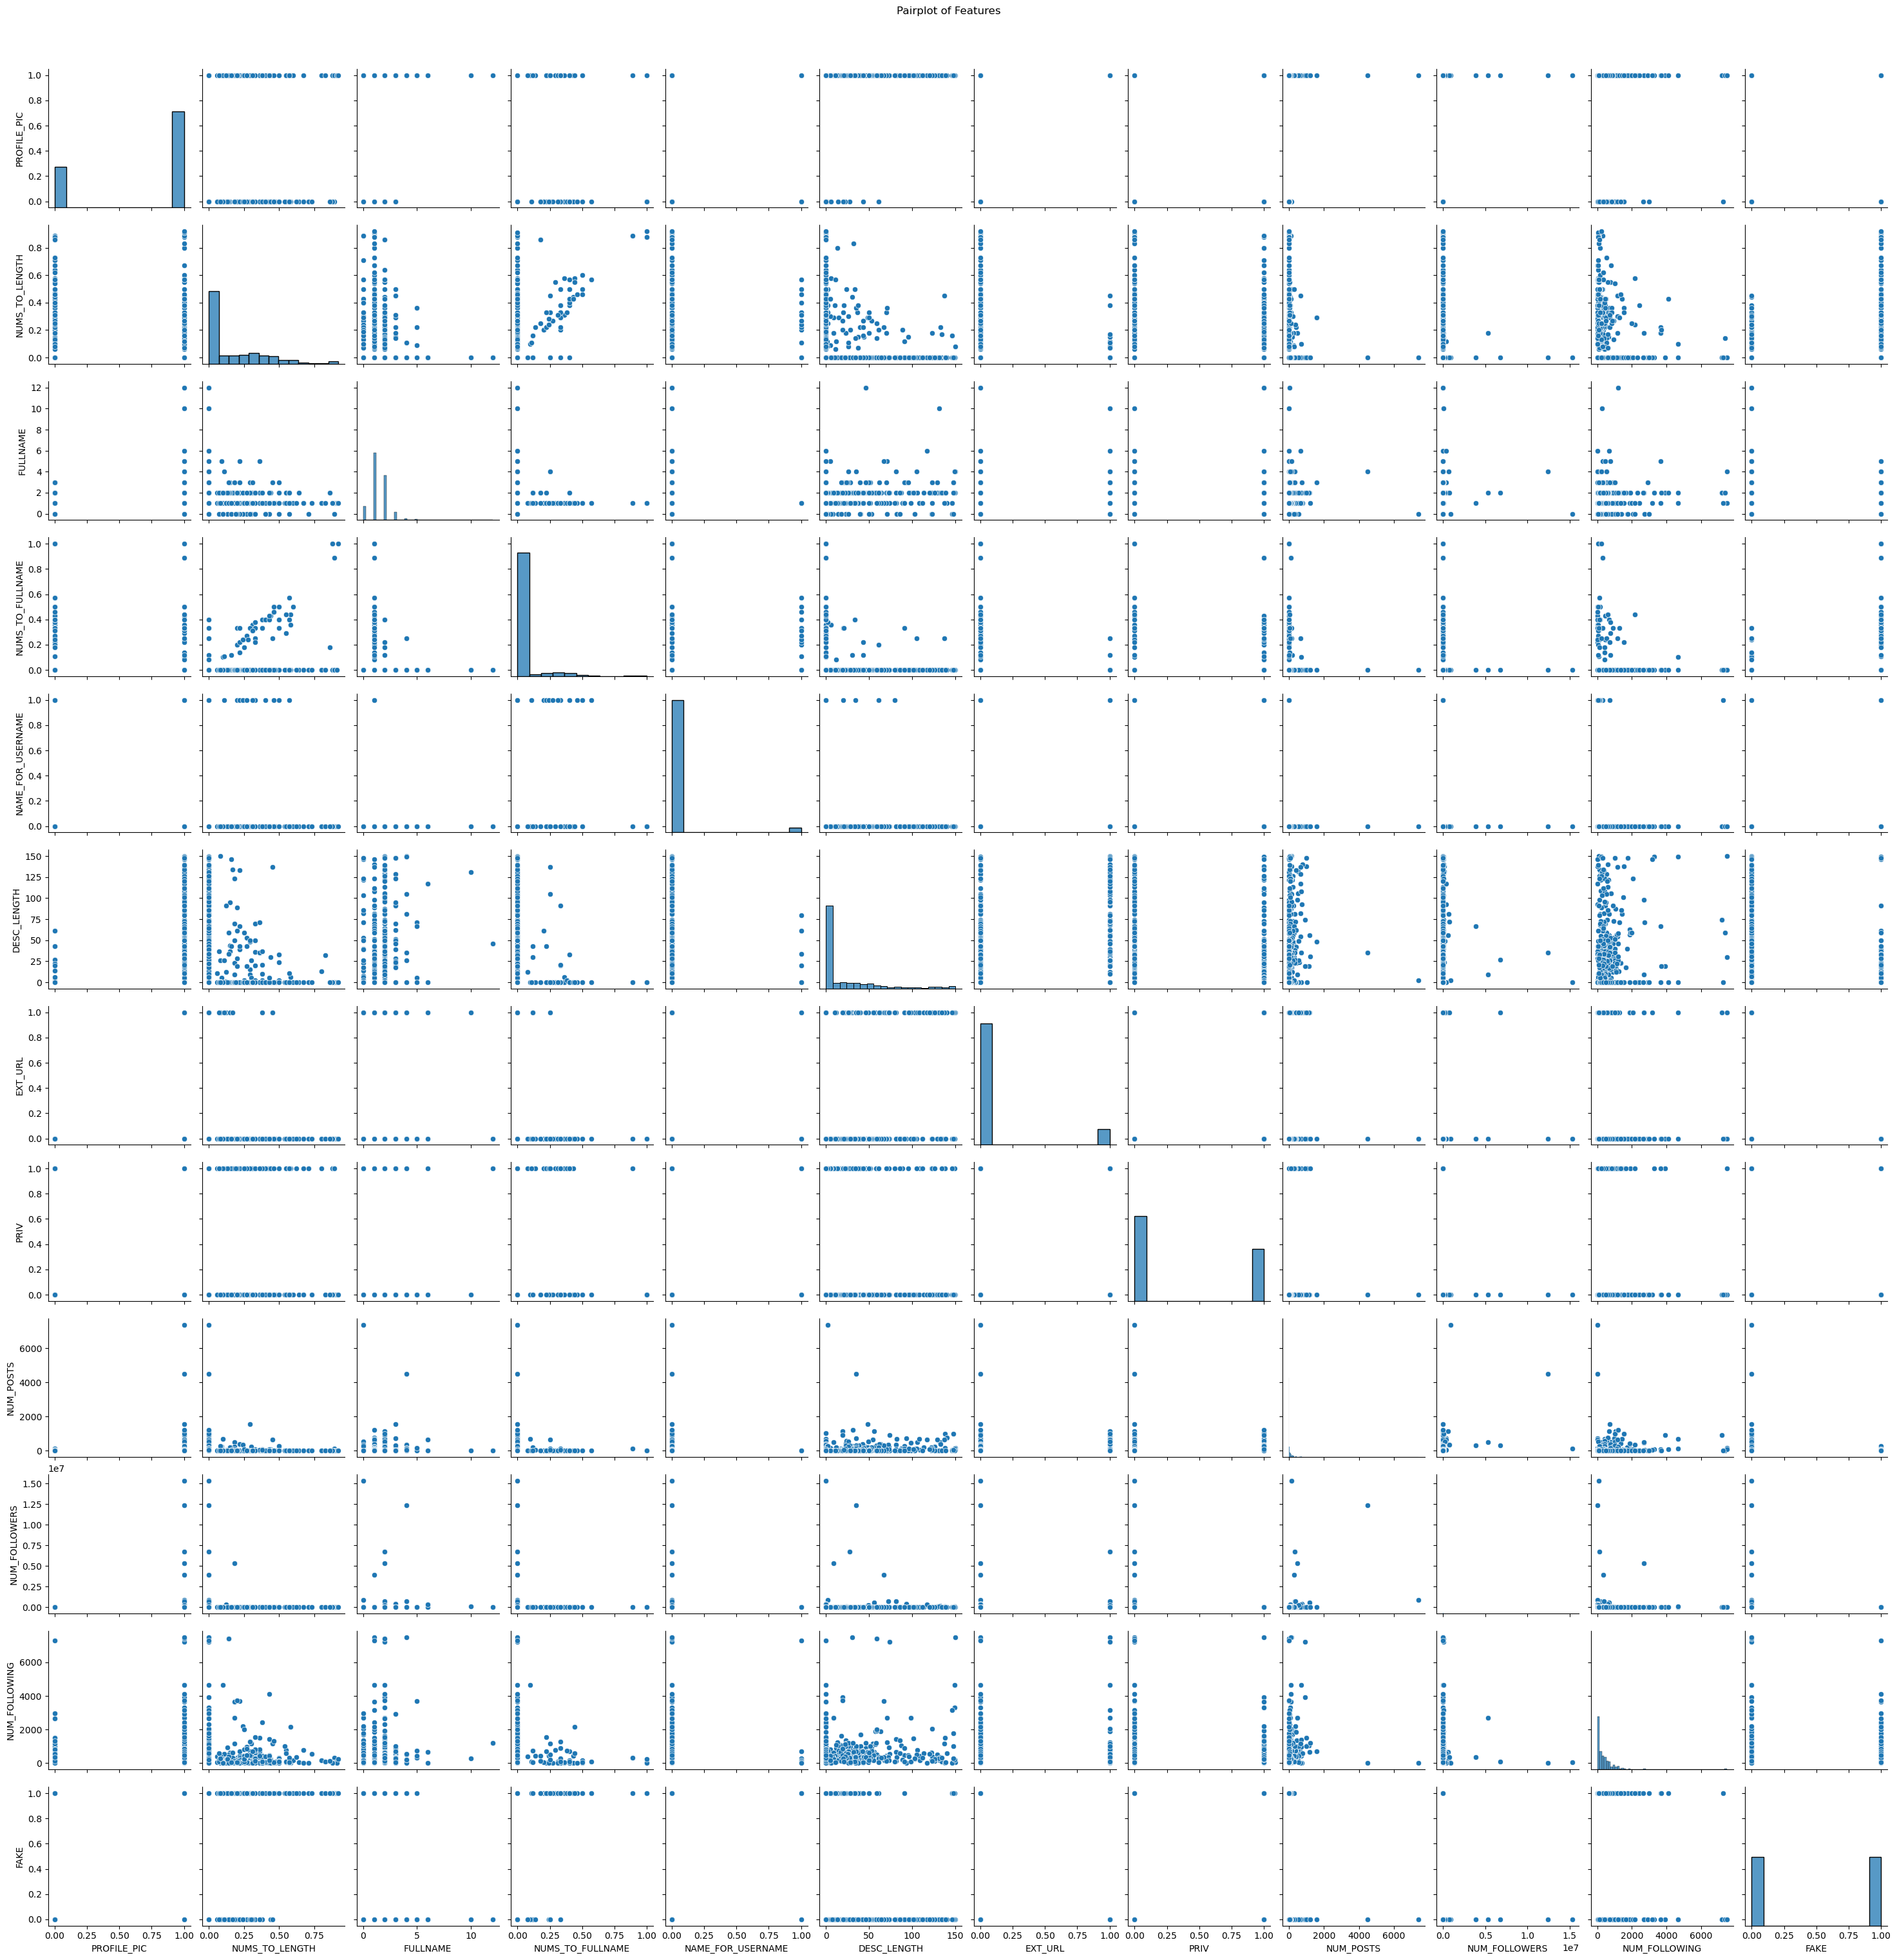

In [4]:
# Pairplot
sns.pairplot(df_numeric)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

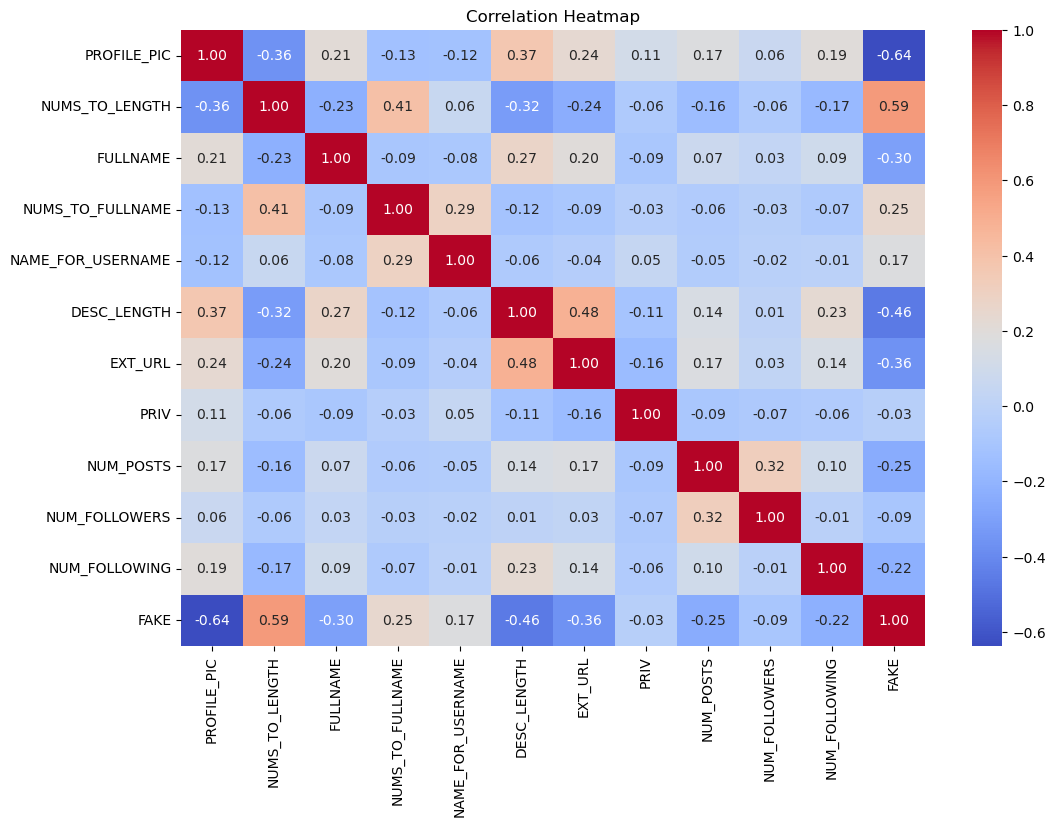

In [5]:
# Heatmap
plt.figure(figsize=(12, 8))
corr = df_numeric.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [7]:
# Correct target label name
X = df.drop("FAKE", axis=1)
y = df["FAKE"]

In [8]:
# Encode target if not numeric
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:

# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Classifier": SVC(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}


In [10]:
# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"=== {name} ===")
    print(classification_report(y_test, preds))

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        63
           1       0.96      0.87      0.91        53

    accuracy                           0.92       116
   macro avg       0.93      0.92      0.92       116
weighted avg       0.93      0.92      0.92       116

=== K-Nearest Neighbors ===
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        63
           1       0.85      0.85      0.85        53

    accuracy                           0.86       116
   macro avg       0.86      0.86      0.86       116
weighted avg       0.86      0.86      0.86       116

=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.85      0.92      0.89        63
           1       0.90      0.81      0.85        53

    accuracy                           0.87       116
   macro avg       0.87      0.87      0.87       

C:\Users\mwill\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.88      0.95      0.92        63
           1       0.94      0.85      0.89        53

    accuracy                           0.91       116
   macro avg       0.91      0.90      0.90       116
weighted avg       0.91      0.91      0.90       116

=== Support Vector Classifier ===
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        63
           1       0.46      1.00      0.63        53

    accuracy                           0.47       116
   macro avg       0.73      0.52      0.35       116
weighted avg       0.76      0.47      0.32       116

=== AdaBoost ===
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        63
           1       0.90      0.87      0.88        53

    accuracy                           0.90       116
   macro avg       0.90      0.89      0.90       116
w

C:\Users\mwill\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [18:35:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== XGBoost ===
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.94      0.87      0.90        53

    accuracy                           0.91       116
   macro avg       0.92      0.91      0.91       116
weighted avg       0.92      0.91      0.91       116



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [12]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss')

}

In [13]:
train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
results = {name: [] for name in classifiers}

for size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=size, random_state=42)
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        acc = accuracy_score(y_test, preds)
        results[name].append(acc)



C:\Users\mwill\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mwill\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

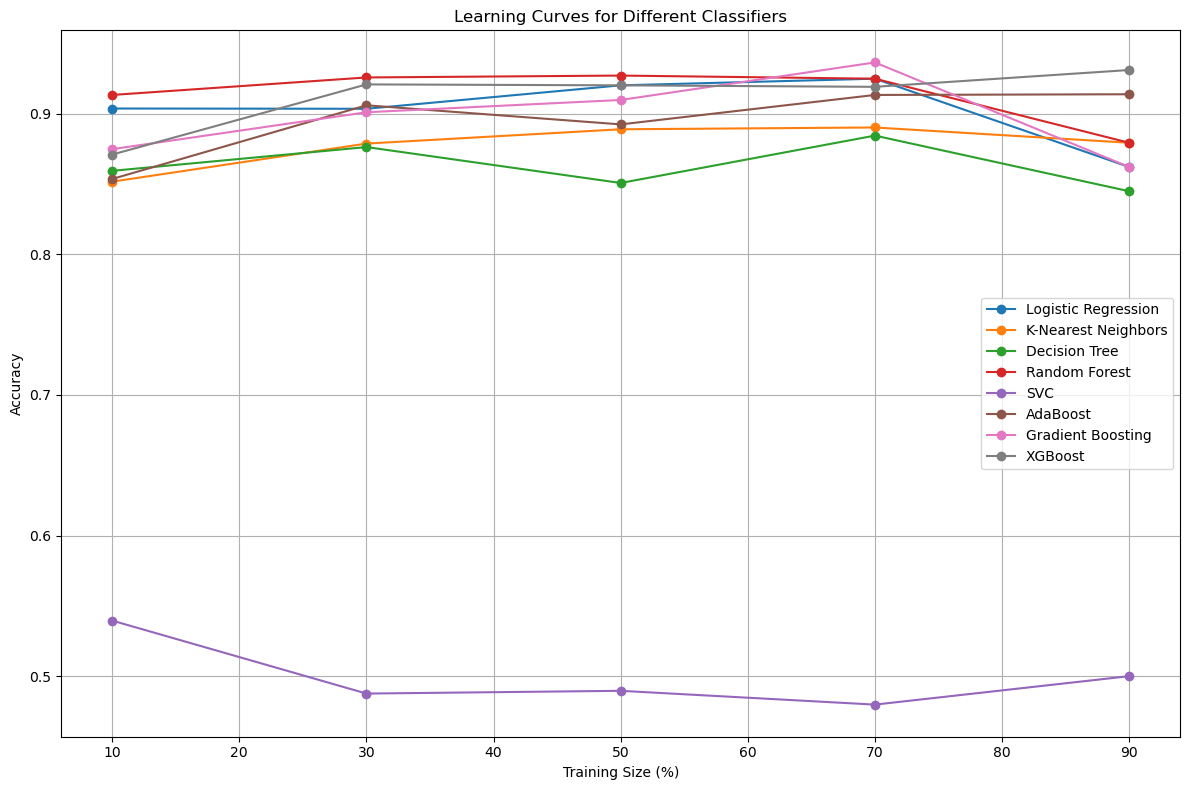

In [14]:

# Plot learning curves
plt.figure(figsize=(12, 8))
for name, scores in results.items():
    plt.plot([int(s*100) for s in train_sizes], scores, marker='o', label=name)
plt.xlabel("Training Size (%)")
plt.ylabel("Accuracy")
plt.title("Learning Curves for Different Classifiers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


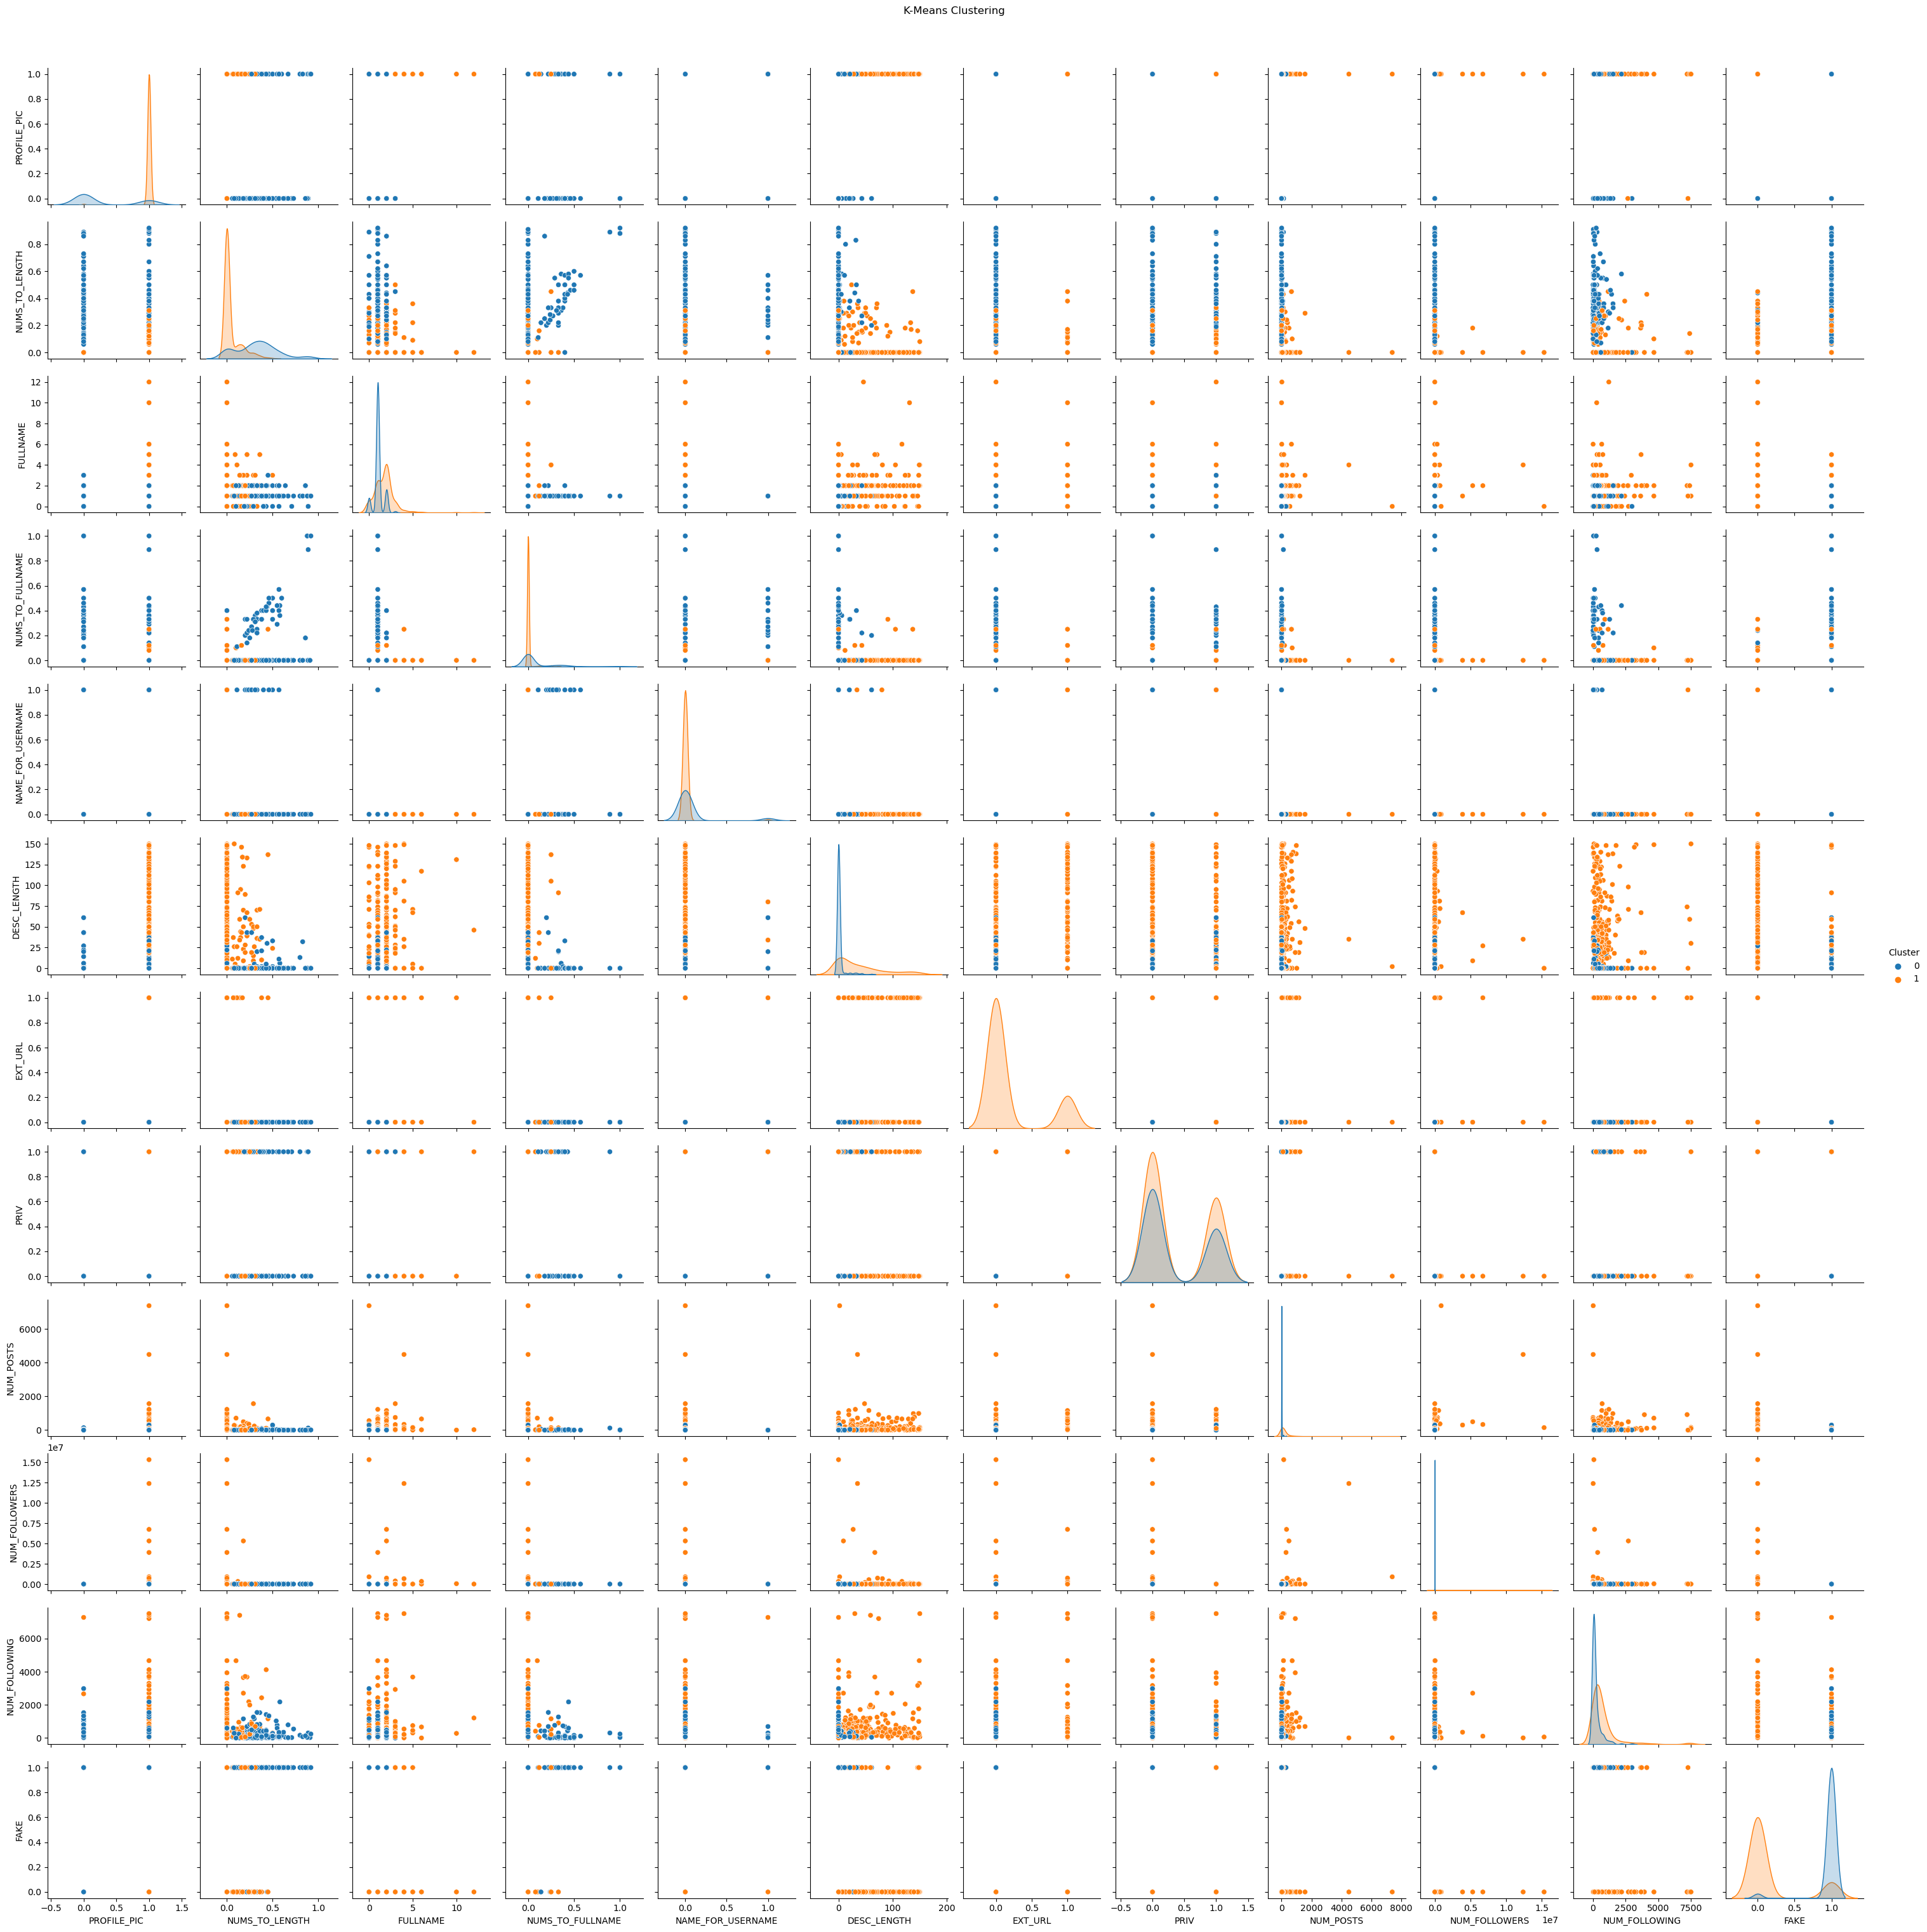

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize data
features = df_numeric.drop(columns=["FAKE"], errors='ignore')  # drop label if present
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
sns.pairplot(df_clean, hue='Cluster', diag_kind='kde')
plt.suptitle("K-Means Clustering", y=1.02)
plt.show()


In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(df['FAKE'], df_clean['Cluster']))


[[  8 280]
 [233  55]]


In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
# Apply DBSCAN
db = DBSCAN(eps=1.5, min_samples=5)
df['Cluster'] = db.fit_predict(X_scaled)

In [19]:
print("Confusion Matrix (Cluster vs FAKE):")
print(confusion_matrix(y, df['Cluster']))

Confusion Matrix (Cluster vs FAKE):
[[  0   0   0   0   0   0   0   0   0   0]
 [ 40 104  92  43   6   2   0   0   0   1]
 [ 32  47  41   0   0  42 107   6   7   6]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


In [20]:
valid_clusters = df[df['Cluster'] != -1]
if not valid_clusters.empty:
    silhouette = silhouette_score(X_scaled[df['Cluster'] != -1], df['Cluster'][df['Cluster'] != -1])
    print(f"Silhouette Score (excluding noise): {silhouette:.4f}")
else:
    print("No valid clusters found (all points labeled as noise).")

Silhouette Score (excluding noise): 0.3428


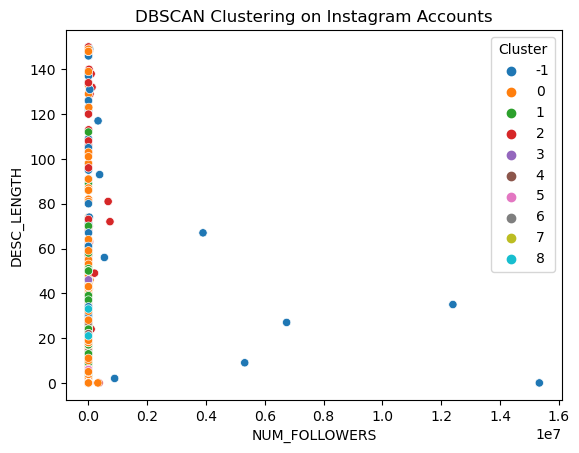

In [21]:
# Visualize clusters using two selected features
sns.scatterplot(data=df, x="NUM_FOLLOWERS", y="DESC_LENGTH", hue="Cluster", palette="tab10")
plt.title("DBSCAN Clustering on Instagram Accounts")
plt.show()

In [22]:
df = pd.read_csv("data/TRAIN.csv").dropna()

# Prepare features
X = df.drop("FAKE", axis=1)
y = df["FAKE"]

In [23]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
from sklearn.decomposition import PCA

In [25]:
# Apply DBSCAN
db = DBSCAN(eps=1.5, min_samples=5)
df['Cluster'] = db.fit_predict(X_scaled)

# Reduce to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

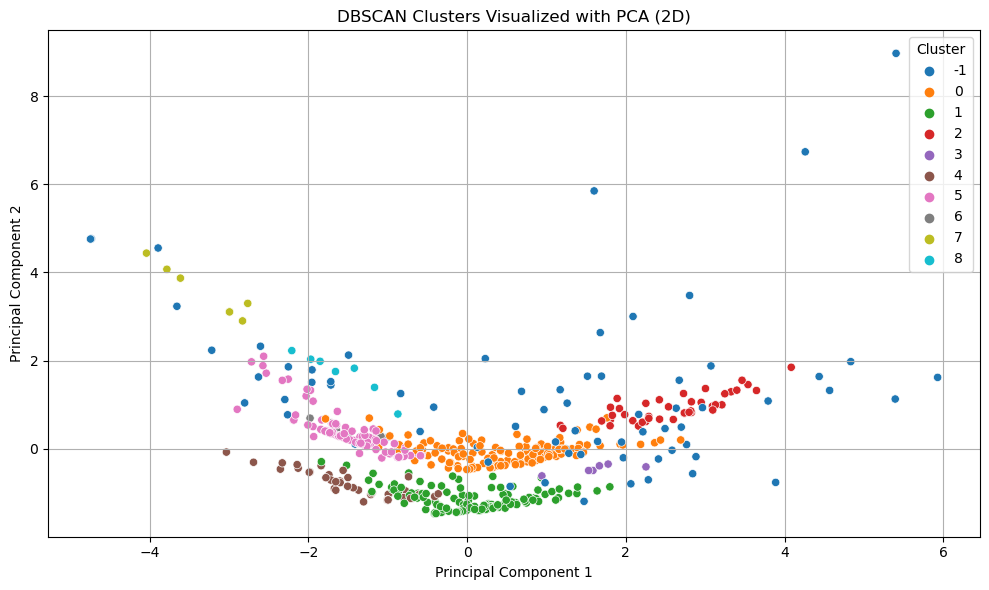

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette="tab10")
plt.title("DBSCAN Clusters Visualized with PCA (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
pd.crosstab(df['Cluster'], y)


FAKE,0,1
Cluster,,
-1,40,32
0,104,47
1,92,41
2,43,0
3,6,0
4,2,42
5,0,107
6,0,6
7,0,7


In [28]:
df[df['Cluster'] == 5].to_csv("confirmed_fake_cluster.csv", index=False)


In [29]:
gold = df[df['Cluster'] == 5]
X_gold = gold.drop(['FAKE', 'Cluster'], axis=1)
y_gold = gold['FAKE']

# Train a simple model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_gold, y_gold)


RandomForestClassifier()

In [30]:
# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.48      1.00      0.65        28

    accuracy                           0.48        58
   macro avg       0.24      0.50      0.33        58
weighted avg       0.23      0.48      0.31        58

Confusion Matrix:
 [[ 0 30]
 [ 0 28]]


C:\Users\mwill\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mwill\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mwill\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# Select gold-standard fake (Cluster 5) and gold-standard real (Cluster 2)
cluster_5 = df[df['Cluster'] == 5]  # fake
cluster_2 = df[df['Cluster'] == 2]  # real

In [32]:
# Combine into clean training set
train_df = pd.concat([cluster_5, cluster_2])
X_train = train_df.drop(columns=['FAKE', 'Cluster'])
y_train = train_df['FAKE']

In [33]:
# Create test set from all other clusters
test_df = df[~df['Cluster'].isin([2, 5])]
X_test = test_df.drop(columns=['FAKE', 'Cluster'])
y_test = test_df['FAKE']

In [34]:
# Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

In [35]:
# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       245
           1       0.76      0.87      0.81       181

    accuracy                           0.83       426
   macro avg       0.83      0.83      0.83       426
weighted avg       0.84      0.83      0.83       426

Confusion Matrix:

[[195  50]
 [ 23 158]]


In [36]:
# Optional: check predictions by cluster
test_df['Predicted_FAKE'] = y_pred
print("\nPredicted FAKE counts by cluster:")
print(pd.crosstab(test_df['Cluster'], test_df['Predicted_FAKE']))


Predicted FAKE counts by cluster:
Predicted_FAKE   0   1
Cluster               
-1              46  26
 0              96  55
 1              69  64
 3               6   0
 4               0  44
 6               0   6
 7               0   7
 8               1   6


C:\Users\mwill\AppData\Local\Temp\ipykernel_11864\586977388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Predicted_FAKE'] = y_pred


In [40]:
# Load your original labeled dataset
df = pd.read_csv("data/TRAIN.csv").dropna()

# Separate features and target
X = df.drop(columns=["FAKE"])
y = df["FAKE"]

In [41]:
# Encode target if not numeric
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train model on scaled data
final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
!pip install joblib

In [43]:
import joblib

In [44]:
# Save the model
joblib.dump(final_model, "logistic_spam_detector.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [45]:
print(scaler.feature_names_in_)

['PROFILE_PIC' 'NUMS_TO_LENGTH' 'FULLNAME' 'NUMS_TO_FULLNAME'
 'NAME_FOR_USERNAME' 'DESC_LENGTH' 'EXT_URL' 'PRIV' 'NUM_POSTS'
 'NUM_FOLLOWERS' 'NUM_FOLLOWING']
